# Step 1 Problem Statement

### Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.
To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

# Step 2 Data Gathering

In [2]:
df=pd.read_csv("train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Step 3 Data Cleaning

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

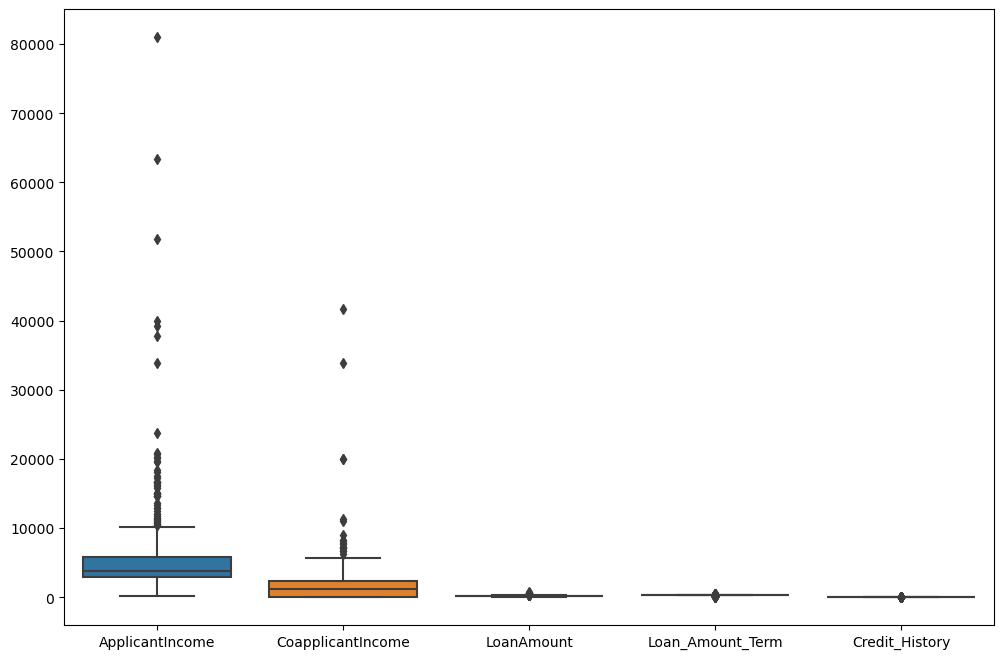

In [9]:
# Checking the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [ ]:
# There are some null values present

### Handling Missing Values

Fill the null values of numerical datatype

In [10]:
# Fill the null values which are in the continuous form with median or mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

Fill the null values of object datatype

In [11]:
# Fill the null values which are in the categorical form with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Zero missing values found

## Step 4 Exploratory Data Analysis (EDA)

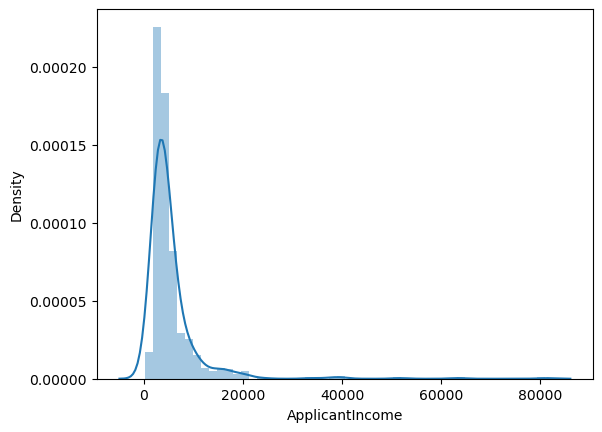

In [13]:
# Checking the density of the aplicant income
sns.distplot(df['ApplicantIncome'])
plt.show()

In [14]:
# Majority people having the income less than 10000
# There are very less amount of people having salary more than 20000

<Axes: xlabel='Gender', ylabel='count'>

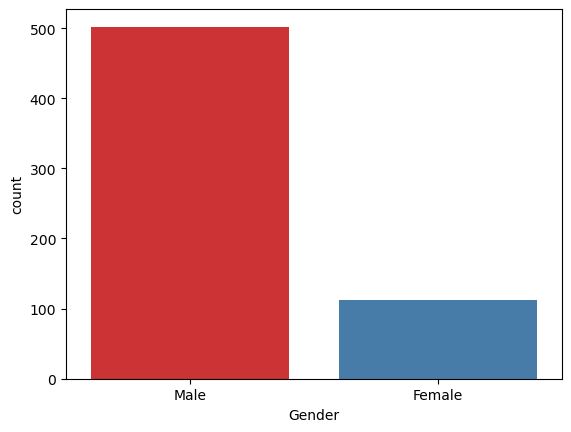

In [15]:
# Number of people who took loan by gender
sns.countplot(x='Gender',data = df, palette='Set1')

In [16]:
# Around 82 % of the total applicants are male
# No of male took the loan 5 times more than the no of females

<Axes: xlabel='Married', ylabel='count'>

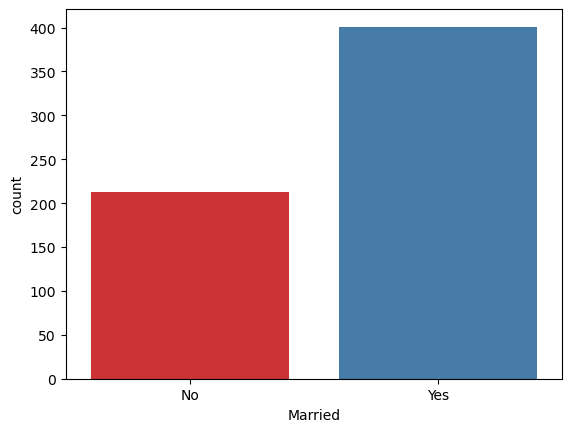

In [17]:
# Number of people who took loan by Married
sns.countplot(x='Married',data = df, palette='Set1')

In [18]:
# Number of married people are more than the unmarried ones almost double
# Chances of taking loan is doubled after marriage

<Axes: xlabel='Education', ylabel='count'>

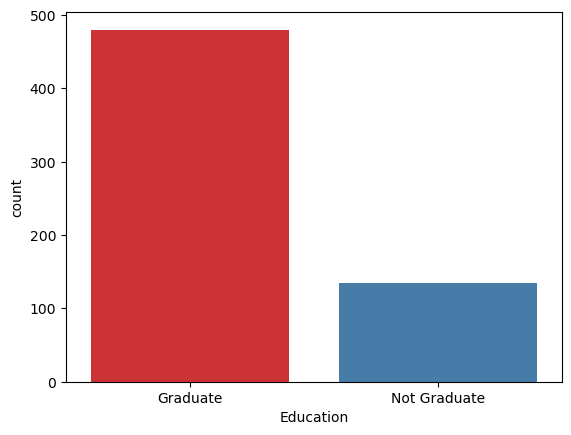

In [19]:
# Number of people who took loan by Education
sns.countplot(x='Education',data = df, palette='Set1')

In [20]:
# Around 80 % people are graduate applies for the loan
# After graduation there are high chances of getting loan

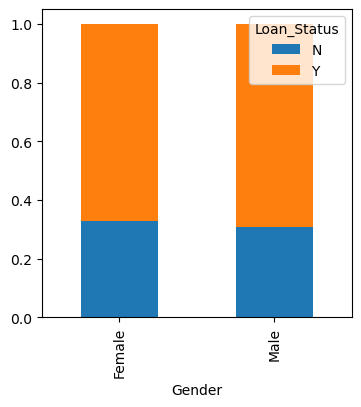

In [21]:
gender = pd.crosstab(df['Gender'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [22]:
# Chances of approval of loan are similar in both  male and female

## Count Total Applicant Income

In [23]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [25]:
# drop unnecessary columns
cols = ['Loan_ID']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [26]:
# Encoding Techniques : Label Encoding, One Hot Encoding
# Lable encoding used when there is any relation in the values for ex. Low,Medium,High
# One Hot Encoding uses when there is no relation in them for ex. Pune,Mumbai,Nashik

In [27]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le =  LabelEncoder()
for col in cols:
  df[col] =  le.fit_transform(df[col])

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [29]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
Total_Income         float64
dtype: object

Split Independent and dependent features

### Testing data 

In [30]:
df1=pd.read_csv("test.csv")
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### Handling Missing Values

In [32]:
df1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Fill the null values of numerical datatype

In [33]:
# Fill the null values which are in the continuous form with median or mean
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].median())
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mean())

Fill the null values of object datatype

In [34]:
# Fill the null values which are in the categorical form with mode
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married'] = df1['Married'].fillna(df1['Married'].mode()[0])
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

In [35]:
df1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [36]:
df1['Total_Income'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']

In [37]:
cols1 = ['Loan_ID']
df1 = df1.drop(columns = cols1, axis = 1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,5720
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4576
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,6800
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4886
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,3276


In [38]:
# Encoding Techniques : Label Encoding, One Hot Encoding
# Lable encoding used when there is any relation in the values for ex. Low,Medium,High
# One Hot Encoding uses when there is no relation in them for ex. Pune,Mumbai,Nashik

In [39]:
cols2 = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area']
le2 =  LabelEncoder()
for col in cols2:
  df1[col] =  le.fit_transform(df1[col])

In [40]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2,5720
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2,4576
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2,6800
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2,4886
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2,3276


In [41]:
df1.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Total_Income           int64
dtype: object

# Step 5 Model Training

In [42]:
# x_train are having independent columns
# y_train having dependent(target) column
x_train = df.drop(columns = ['Loan_Status'],axis = 1)
y_train = df['Loan_Status']

In [43]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,2900.0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,4106.0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,8312.0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,7583.0


In [44]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [45]:
x_test = df1

In [46]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2,5720
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2,4576
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2,6800
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2,4886
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2,3276
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.000000,2,5786
363,1,1,0,0,0,4158,709,115.0,360.0,1.000000,2,4867
364,1,0,0,0,0,3250,1993,126.0,360.0,0.825444,1,5243
365,1,1,0,0,0,5000,2393,158.0,360.0,1.000000,0,7393


## 1) Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score 

In [48]:
log_model = LogisticRegression()

In [49]:
log_model.fit(x_train,y_train)

LogisticRegression()

Training data evaluation

In [50]:
ypredtrain = log_model.predict(x_train)

acc_lr = accuracy_score(y_train,ypredtrain)
print('Accuracy: ',acc_lr)

Confusion_matrix = confusion_matrix(y_train,ypredtrain)
print('Confusion_matrix : \n',Confusion_matrix)

Classification_report = classification_report(y_train,ypredtrain)
print('Classification_report : \n',Classification_report)

Accuracy:  0.6872964169381107
Confusion_matrix : 
 [[  2 190]
 [  2 420]]
Classification_report : 
               precision    recall  f1-score   support

           0       0.50      0.01      0.02       192
           1       0.69      1.00      0.81       422

    accuracy                           0.69       614
   macro avg       0.59      0.50      0.42       614
weighted avg       0.63      0.69      0.57       614



y_pred_prob= log_model.predict_proba(x_test)
y_pred_prob

## 2) K-Nearest Neighbour (KNN)

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 

In [52]:
Knn_model = KNeighborsClassifier()
Knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
## Training Data Evaluation
y_pred_train = Knn_model.predict(x_train)
cf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is:\n', cf_matrix)

acc= accuracy_score(y_train,y_pred_train)
print('\nAccuracy is:',acc)

clf_Report = classification_report(y_train,y_pred_train)
print('\nClassification Report is:\n',clf_Report)


Confusion Matrix is:
 [[ 64 128]
 [ 34 388]]

Accuracy is: 0.7361563517915309

Classification Report is:
               precision    recall  f1-score   support

           0       0.65      0.33      0.44       192
           1       0.75      0.92      0.83       422

    accuracy                           0.74       614
   macro avg       0.70      0.63      0.63       614
weighted avg       0.72      0.74      0.71       614



### Hyperparameter Tunning

In [54]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [55]:
knn_model = KNeighborsClassifier()
hyp = {'p':[1,2],'n_neighbors' : np.arange(3,30)} 
gscv_knn_model = GridSearchCV(knn_model, hyp, cv=5) # cv= cross validation
gscv_knn_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [56]:
gscv_knn_model.best_params_

{'n_neighbors': 19, 'p': 2}

In [57]:
y_pred_new = gscv_knn_model.predict(x_train)

acc_knn= accuracy_score(y_train,y_pred_new)
print('Accuracy:', acc_knn)

Accuracy: 0.6970684039087948


## 3) Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [59]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
## Training Data
y_pred_train = dt_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print('\nAccuracy Score :\n', acc)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[192   0]
 [  0 422]]

Accuracy Score :
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



## Hyperparameter Tunning

In [61]:
dt_model = DecisionTreeClassifier()

hyp= {'criterion' : ['gini','entropy'],
'max_depth': np.arange(1,15),
'min_samples_leaf':np.arange(2,10), 
'min_samples_split':np.arange(2,20)}

gscv_dt_model = GridSearchCV(dt_model, hyp, cv=7)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [62]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2)

In [63]:
## Training Data after hyper parameter tunning
y_pred_train = gscv_dt_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_dt = accuracy_score(y_train,y_pred_train)
print('\nAccuracy Score :\n', acc_dt)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[ 82 110]
 [  7 415]]

Accuracy Score :
 0.8094462540716613

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



## 4) Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
# Model Training with RF
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
y_pred_rf = rf_model.predict(x_train)
rf_acc = accuracy_score(y_train, y_pred_rf)

## Hyperparameter Tunning

In [67]:
rf_model = RandomForestClassifier()
hyp = {'criterion': ['gini','entropy'],
 'n_estimators': np.arange(10,200,10),
 'max_depth': np.arange(2,10),
 'min_samples_split': np.arange(2,20),
 'min_samples_leaf': np.arange(2,10)}
rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv=7)
rscv_rf_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [68]:
rscv_rf_clf.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=11,
                       n_estimators=80)

In [69]:
rf_model = RandomForestClassifier(max_depth=8,
 min_samples_leaf=2,
min_samples_split=8,
 n_estimators=80,
max_features=10,# log2(no. of features)
 oob_score = True)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=80, oob_score=True)

In [70]:
# Train data Accuracy
y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion MAtrix: ',cnf_matrix)

acc_rf = accuracy_score(y_train,y_pred_train)
print('\nAccuracy score is', acc_rf)


Confusion MAtrix:  [[113  79]
 [  8 414]]

Accuracy score is 0.8583061889250815


In [71]:
rf_model.oob_score_

0.8029315960912052

## 5) AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ada_boost = AdaBoostClassifier(n_estimators=1,random_state=1)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=1, random_state=1)

In [74]:
# Training data evaluation

y_pred_train = ada_boost.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix is\n', cnf_matrix)

acc_ab = accuracy_score(y_train,y_pred_train)
print('Accuracy is', acc_ab)

clf_report= classification_report(y_train,y_pred_train)
print('Classification report', clf_report)

Confusion Matrix is
 [[ 82 110]
 [  7 415]]
Accuracy is 0.8094462540716613
Classification report               precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



In [75]:
ada_boost.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [76]:
s1 = pd.Series(ada_boost.feature_importances_, index=x_train.columns)
s1

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       1.0
Property_Area        0.0
Total_Income         0.0
dtype: float64

<Axes: >

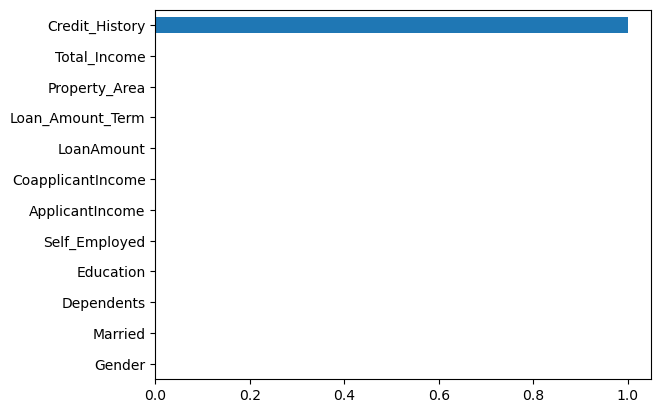

In [77]:
s1 = pd.Series(ada_boost.feature_importances_, index=x_train.columns)
s1.sort_values().plot(kind ='barh')

## Comparing the accuracies

In [78]:
# Model Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost'],
    'Score' : [100*round(acc_lr,4), 100*round(acc_knn,4), 100*round(acc_dt,4), 100*round(acc_rf,4), 100*round(acc_ab,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,85.83
2,Decision Tree Classifier,80.94
4,AdaBoost,80.94
1,KNN,69.71
0,Logistic Regression,68.73


# Conclusion

So according to the above Acuuracies found we can use **Random Forest** classifier for the better accuracy